In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
from tabulate import tabulate
from itertools import product

# Modelos de Machine Learning
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
import xgboost as xgb

# Preprocesamiento
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Model Selection y Validación
from sklearn.model_selection import (
    train_test_split, cross_val_score, learning_curve, validation_curve
)

# Métricas
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix, roc_auc_score,
    roc_curve, precision_recall_curve, precision_score, recall_score, f1_score
)


In [40]:
# Cargar el archivo CSV limpio
data_limpia = pd.read_csv('../data/data_limpia.csv')

# Ver las primeras filas del DataFrame para confirmar que se ha cargado correctamente
data_limpia.head()

,CODE,PRODUCTO,TIPO_CARROCERIA,COMBUSTIBLE,Potencia,TRANS,FORMA_PAGO,ESTADO_CIVIL,GENERO,OcupaciOn,...,Zona_Renta,REV_Garantia,Averia_grave,QUEJA_CAC,COSTE_VENTA,km_anno,Mas_1_coche,Revisiones,Edad_Cliente,Tiempo
0,0,0,0,0,1,1,0,0,1,1,...,2,0,2,1,2892,0,0,2,18,0
1,11111,0,0,0,1,1,0,0,0,1,...,2,1,3,0,1376,7187,0,2,53,0
2,22222,0,0,0,1,1,3,0,1,1,...,1,0,3,0,1376,0,1,4,21,3
3,33333,0,0,0,1,1,2,0,0,1,...,1,1,2,1,2015,7256,1,4,48,5
4,53605,0,0,0,1,1,2,0,0,1,...,1,1,1,0,2015,11293,0,2,56,0


In [41]:
# Definir las características (features) y el objetivo (target)
X = data_limpia.drop(columns=['Mas_1_coche', 'Tiempo'])  # Eliminamos también la columna 'Tiempo'
y = data_limpia['Mas_1_coche']  # Objetivo (si el cliente comprará un segundo coche)


In [42]:
# Dividir los datos en entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [43]:
# Random Forest con criterio 'gini'
rf_gini = RandomForestClassifier(criterion='gini', random_state=42)
rf_gini.fit(X_train, y_train)

# Predicciones con el modelo de Gini
y_pred_gini = rf_gini.predict(X_test)

# Evaluación del modelo con Gini
print("Modelo con Gini")
print("Accuracy:", accuracy_score(y_test, y_pred_gini))
print(classification_report(y_test, y_pred_gini))

Modelo con Gini
Accuracy: 0.8649597357010118
              precision    recall  f1-score   support

           0       0.88      0.93      0.91      6847
           1       0.81      0.71      0.75      2839

    accuracy                           0.86      9686
   macro avg       0.85      0.82      0.83      9686
weighted avg       0.86      0.86      0.86      9686



Criterion: gini, Max Depth: 3, Min Samples Split: 2, Min Samples Leaf: 1, N Estimators: 50
Accuracy: 0.7400371670452199, F1 Score: 0.6616198034493769, Recall: 0.7400371670452199, ROC-AUC: 0.8547888629822888, CV Score: 0.7411461022199277, Train Score: 0.7421786267423851, Overfitting: OK
Criterion: gini, Max Depth: 3, Min Samples Split: 2, Min Samples Leaf: 1, N Estimators: 100
Accuracy: 0.7477803014660335, F1 Score: 0.6782957470261968, Recall: 0.7477803014660335, ROC-AUC: 0.8597466190137959, CV Score: 0.748631905007744, Train Score: 0.7510583376355189, Overfitting: OK
Criterion: gini, Max Depth: 3, Min Samples Split: 2, Min Samples Leaf: 2, N Estimators: 50
Accuracy: 0.7400371670452199, F1 Score: 0.6616198034493769, Recall: 0.7400371670452199, ROC-AUC: 0.8547888629822888, CV Score: 0.7411461022199277, Train Score: 0.7421786267423851, Overfitting: OK
Criterion: gini, Max Depth: 3, Min Samples Split: 2, Min Samples Leaf: 2, N Estimators: 100
Accuracy: 0.7477803014660335, F1 Score: 0.67829

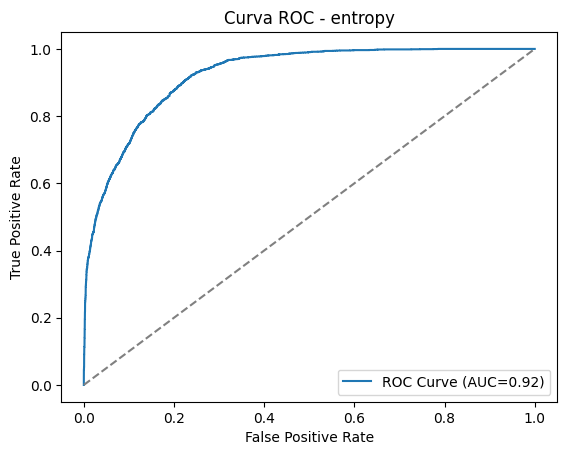

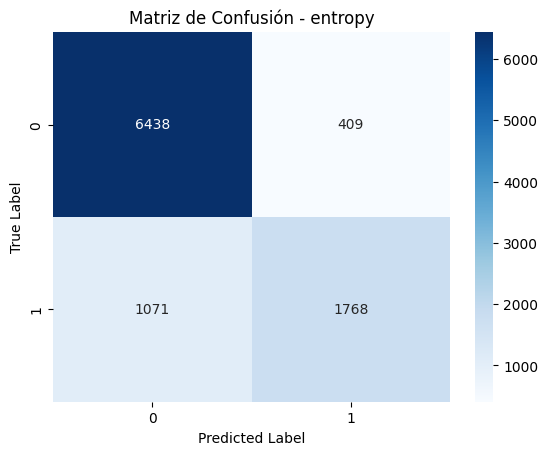

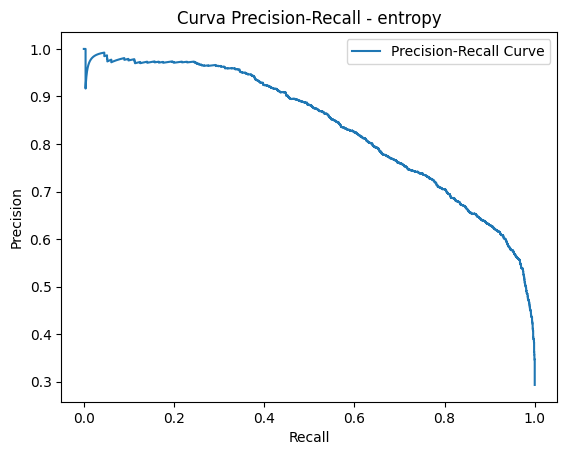


--------------------------------------------------
Modelo Optimizado 52
--------------------------------------------------
Criterion: gini, Max Depth: 10, Min Samples Split: 10, Min Samples Leaf: 2, N Estimators: 100

Classification Report for gini - 10:
              precision    recall  f1-score   support

           0       0.86      0.94      0.90      6847
           1       0.82      0.62      0.70      2839

    accuracy                           0.85      9686
   macro avg       0.84      0.78      0.80      9686
weighted avg       0.84      0.85      0.84      9686


ROC-AUC Score: 0.9235403281701959



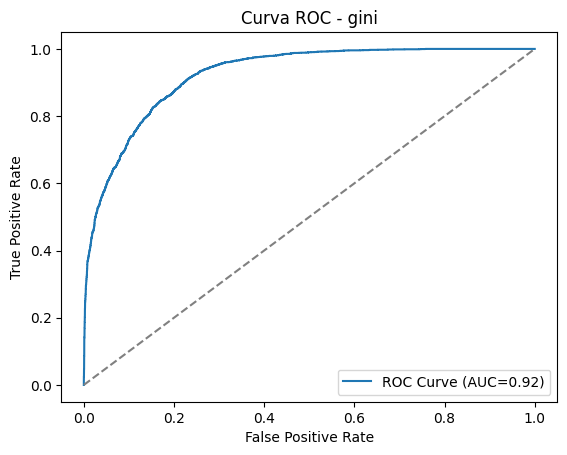

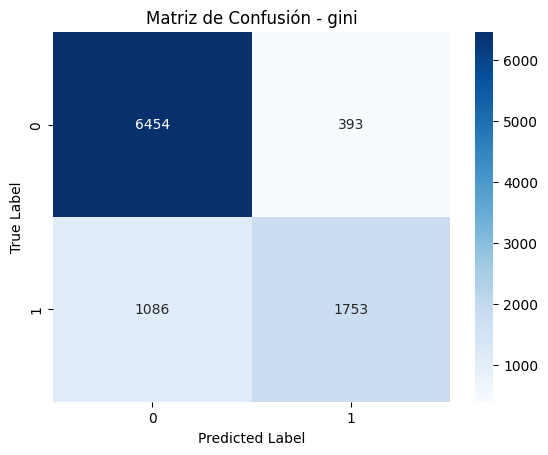

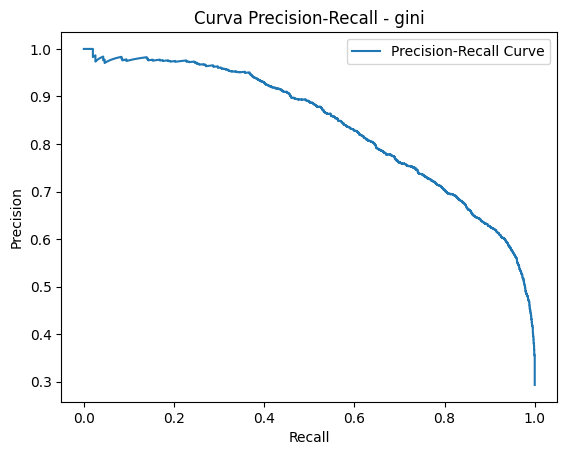


--------------------------------------------------
Modelo Optimizado 44
--------------------------------------------------
Criterion: gini, Max Depth: 10, Min Samples Split: 5, Min Samples Leaf: 1, N Estimators: 100

Classification Report for gini - 10:
              precision    recall  f1-score   support

           0       0.86      0.94      0.90      6847
           1       0.81      0.62      0.70      2839

    accuracy                           0.85      9686
   macro avg       0.83      0.78      0.80      9686
weighted avg       0.84      0.85      0.84      9686


ROC-AUC Score: 0.9242091251992874



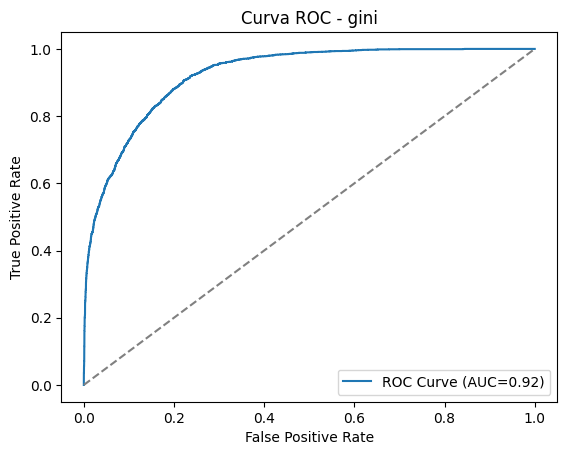

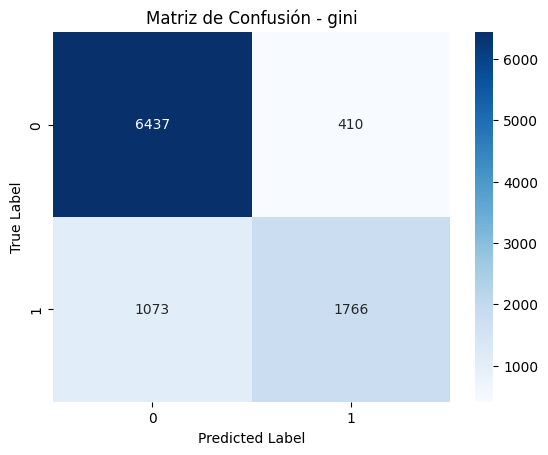

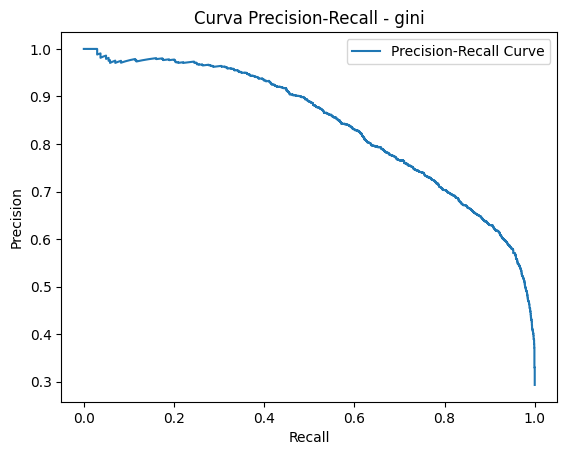

,criterion,max_depth,min_samples_split,min_samples_leaf,n_estimators,accuracy,f1_score,recall,roc_auc,cv_score,train_score,overfitting
93,entropy,10,2,2,100,0.847202,0.840642,0.847202,0.923504,0.840785,0.869076,OK
51,gini,10,10,2,100,0.847305,0.840369,0.847305,0.923540,0.840268,0.869644,OK
43,gini,10,5,1,100,0.846892,0.840307,0.846892,0.924209,0.839391,0.870496,OK


In [44]:
# Definir los parámetros para la búsqueda de Grid
param_grid = {
    'criterion': ['gini', 'entropy'],  # Usamos dos criterios principales para evaluar
    'max_depth': [3, 5, 10],  # Profundidad máxima de los árboles
    'min_samples_split': [2, 5, 10],  # Mínimo de muestras para dividir un nodo
    'min_samples_leaf': [1, 2, 5],  # Mínimo de muestras en una hoja
    'n_estimators': [50, 100],  # Número de árboles en el modelo
}

# Almacenar los resultados
results = []

# Iterar sobre todas las combinaciones de hiperparámetros
for params in product(*param_grid.values()):
    criterion, max_depth, min_samples_split, min_samples_leaf, n_estimators = params
    
    # Construir el modelo RandomForest con los hiperparámetros actuales
    model = RandomForestClassifier(
        criterion=criterion, 
        max_depth=max_depth, 
        min_samples_split=min_samples_split, 
        min_samples_leaf=min_samples_leaf,
        n_estimators=n_estimators,
        random_state=42
    )
    

    
    # Entrenar el modelo
    model.fit(X_train, y_train)
    
    # Predecir en el conjunto de prueba
    y_pred = model.predict(X_test)
    
    # Calcular las métricas de rendimiento
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    
    # Calcular ROC-AUC si hay más de una clase
    if len(np.unique(y_test)) > 1:
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        roc_auc = roc_auc_score(y_test, y_pred_proba)
    else:
        roc_auc = None
    
    # Validación cruzada
    cv_scores = cross_val_score(model, X_train, y_train, cv=5)
    mean_cv_score = np.mean(cv_scores)
    
    # Calcular Train Score
    train_score = model.score(X_train, y_train)
    
    # Determinar si hay sobreajuste
    if train_score > 1.5 * mean_cv_score:
        overfitting_warning = "SEVERE OVERFITTING"
    elif train_score > 1.2 * mean_cv_score:
        overfitting_warning = "DANGER"
    elif train_score > 1.1 * mean_cv_score:
        overfitting_warning = "MILD OVERFITTING"
    else:
        overfitting_warning = "OK"
    
    # Guardar los resultados
    results.append({
        'criterion': criterion,
        'max_depth': int(max_depth) if pd.notna(max_depth) else None,
        'min_samples_split': min_samples_split,
        'min_samples_leaf': min_samples_leaf,
        'n_estimators': n_estimators,
        'accuracy': accuracy,
        'f1_score': f1,
        'recall': recall,
        'roc_auc': roc_auc,
        'cv_score': mean_cv_score,
        'train_score': train_score,
        'overfitting': overfitting_warning
    })

# Imprimir resultados parciales
    print(f"Criterion: {criterion}, Max Depth: {max_depth}, Min Samples Split: {min_samples_split}, Min Samples Leaf: {min_samples_leaf}, N Estimators: {n_estimators}")
    print(f"Accuracy: {accuracy}, F1 Score: {f1}, Recall: {recall}, ROC-AUC: {roc_auc}, CV Score: {mean_cv_score}, Train Score: {train_score}, Overfitting: {overfitting_warning}")

# Convertir los resultados a un DataFrame
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by=['f1_score', 'accuracy'], ascending=False)

# Seleccionar los mejores modelos sin sobreajuste y optimizando F1 Score
best_models = results_df[results_df['overfitting'] == 'OK'].head(3)

# Mostrar los mejores modelos y sus métricas
for index, row in best_models.iterrows():
    print('\n' + '-' * 50)
    print(f'Modelo Optimizado {index + 1}')
    print('-' * 50)
    print(f'Criterion: {row["criterion"]}, Max Depth: {row["max_depth"]}, Min Samples Split: {row["min_samples_split"]}, Min Samples Leaf: {row["min_samples_leaf"]}, N Estimators: {row["n_estimators"]}')
    print(f'\nClassification Report for {row["criterion"]} - {row["max_depth"]}:')
    
    model = RandomForestClassifier(
        criterion=row["criterion"], 
        max_depth=row["max_depth"], 
        min_samples_split=row["min_samples_split"], 
        min_samples_leaf=row["min_samples_leaf"],
        n_estimators=row["n_estimators"],
        random_state=42
    )
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    
    if len(np.unique(y_test)) > 1:
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        roc_auc = roc_auc_score(y_test, y_pred_proba)
        print(f'\nROC-AUC Score: {roc_auc}\n')
        
        # Curva ROC
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        plt.figure()
        plt.plot(fpr, tpr, label=f"ROC Curve (AUC={roc_auc:.2f})")
        plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'Curva ROC - {row["criterion"]}')
        plt.legend()
        plt.show()
        
        # Matriz de confusión
        plt.figure()
        sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.title(f'Matriz de Confusión - {row["criterion"]}')
        plt.show()
        
        # Curva Precision-Recall
        precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
        plt.figure()
        plt.plot(recall, precision, label='Precision-Recall Curve')
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.title(f'Curva Precision-Recall - {row["criterion"]}')
        plt.legend()
        plt.show()

# Mostrar los mejores modelos en una tabla
from IPython.display import display
display(best_models)

